In [1]:
import numpy as np
import scanpy as sc
import multigrate as mtg

Global seed set to 0
/home/ubuntu/miniconda3/envs/multigrate/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/ubuntu/miniconda3/envs/multigrate/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#read data
rna = sc.read('./data/cite/rna_cite_hvg.h5ad')
adt = sc.read('./data/cite/adt.h5ad')

In [3]:
#prepare the input Anndata object
adata = mtg.data.organize_multiome_anndatas(
    adatas = [[rna], [adt]],            # a list of anndata objects per modality, RNA-seq always goes first
    layers = [['counts'], ['clr']],     # if need to use data from .layers, if None use .X
)
#adata.write("/home/ubuntu/data/cite_data_multigrate.h5ad")

/home/ubuntu/miniconda3/envs/multigrate/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
mtg.model.MultiVAE.setup_anndata(
    adata,
    categorical_covariate_keys=["batch"],
    rna_indices_end = 4000,
)
#adata.write("/home/ubuntu/data/cite_data_multigrate.h5ad")

In [5]:
#initialize the model
model = mtg.model.MultiVAE(
    adata,
    losses=['nb', 'mse'],
)
#train the model
model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/ubuntu/miniconda3/envs/multigrate/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:267: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [21:53<00:00,  6.47s/it, loss=1.08e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [21:53<00:00,  6.57s/it, loss=1.08e+03, v_num=1]


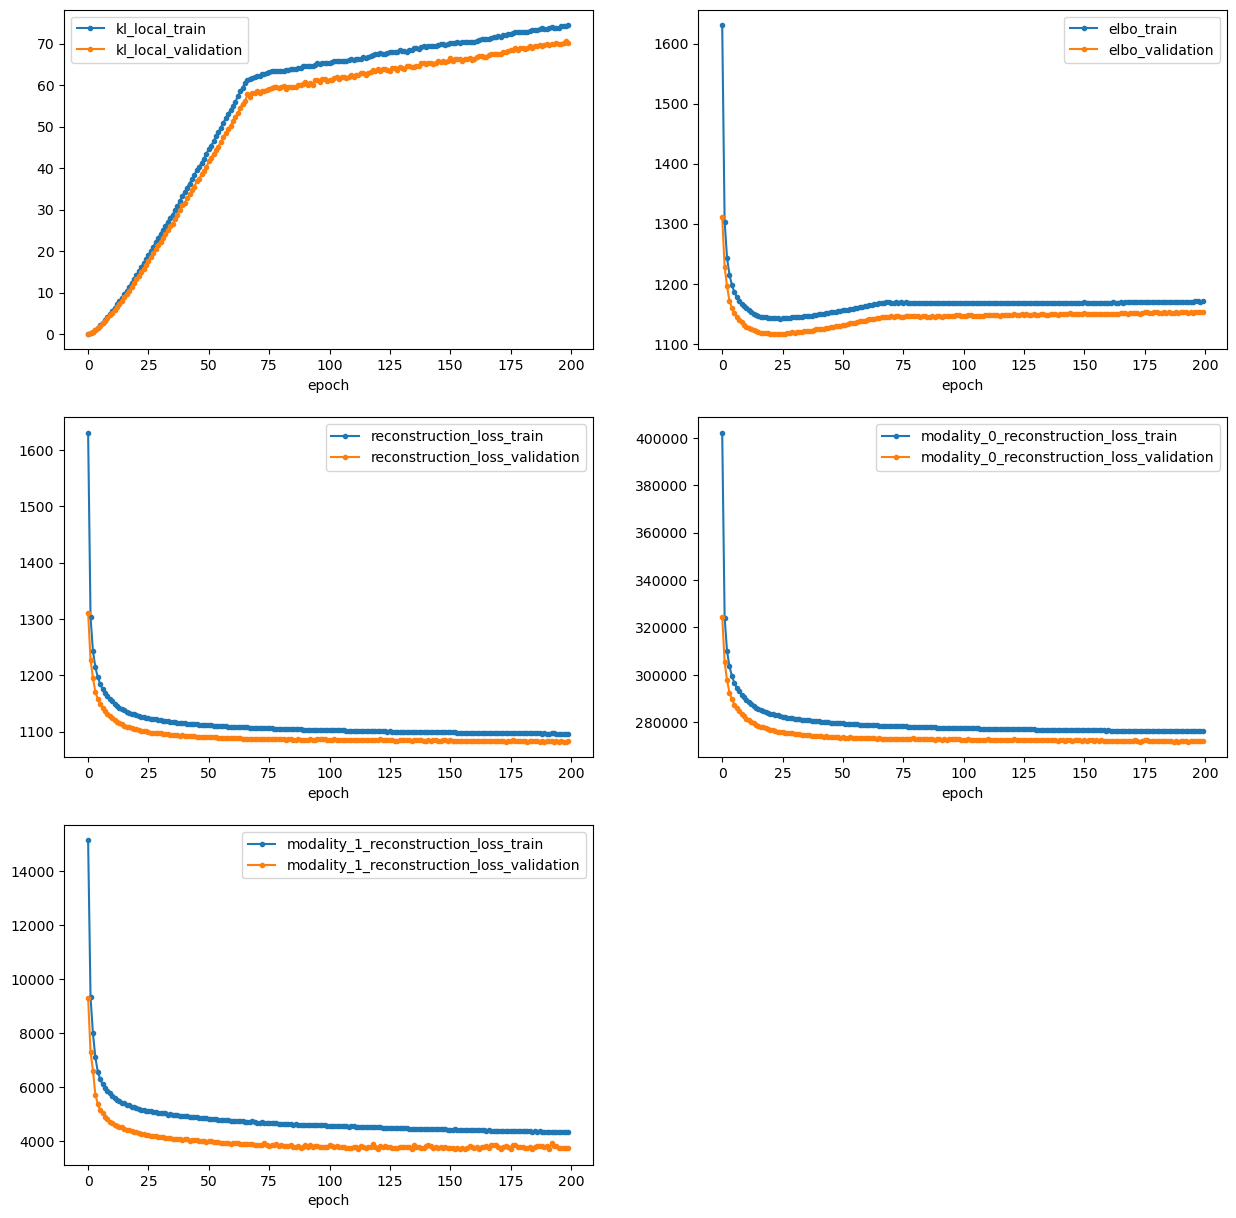

In [6]:
model.plot_losses()

In [7]:
adata

AnnData object with n_obs × n_vars = 90261 × 4134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'group', 'size_factors', '_scvi_batch'
    var: 'modality'
    uns: 'modality_lengths', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs'
    layers: 'counts'

In [7]:
#Get the latent representation.
model.get_latent_representation()
sc.pp.neighbors(adata, use_rep='latent')
sc.tl.umap(adata)

/home/ubuntu/miniconda3/envs/multigrate/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu/miniconda3/envs/multigrate/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


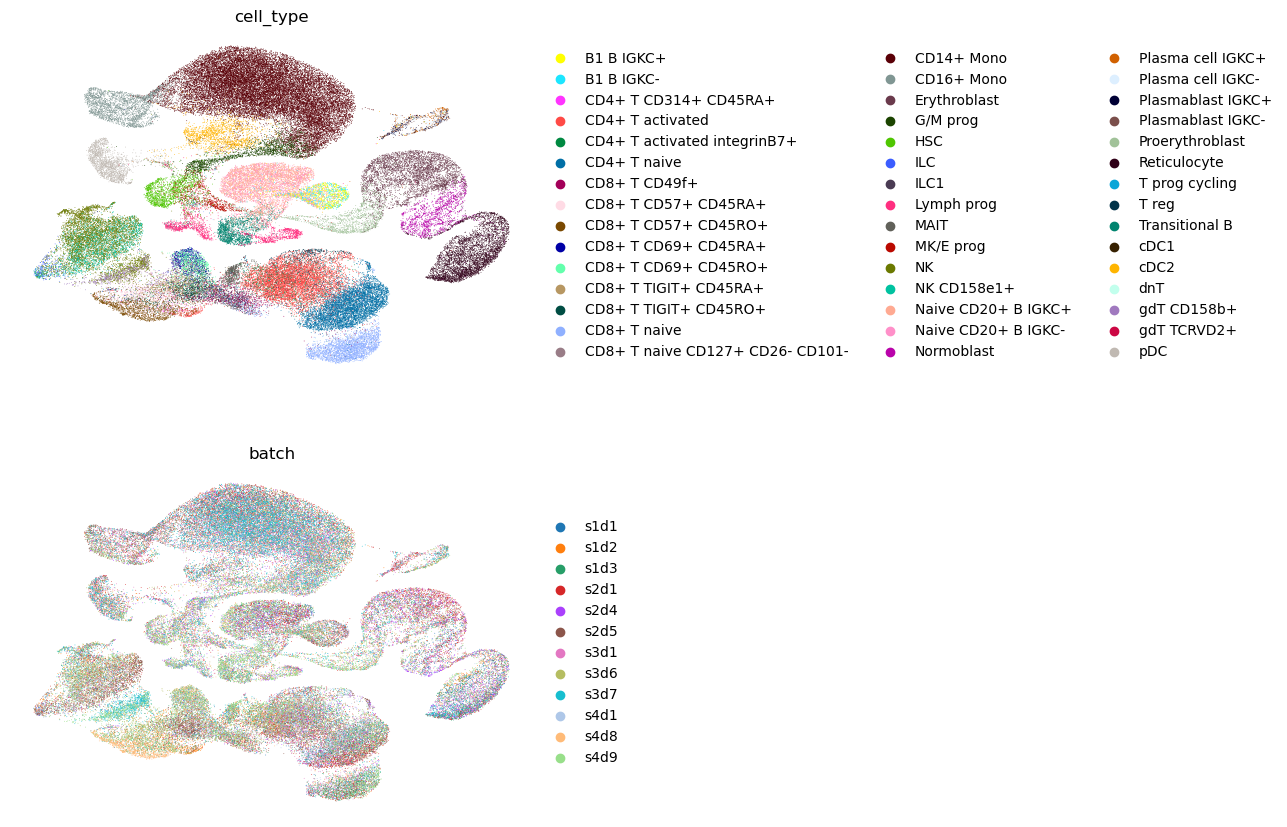

In [8]:

sc.pl.umap(adata, color=['cell_type', 'batch'], frameon=False, ncols=1)


In [9]:
adata

AnnData object with n_obs × n_vars = 90261 × 4134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'group', 'size_factors', '_scvi_batch'
    var: 'modality'
    uns: 'modality_lengths', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'cell_type_colors', 'batch_colors'
    obsm: '_scvi_extra_categorical_covs', 'latent', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [10]:
adata.write("/home/ubuntu/data/cite_data_multigrate.h5ad")

FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'home/ubuntu/data/cite_data_multigrate.h5ad', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [ ]:
import scib

cite = sc.read("/home/ubuntu/data/cite_data.h5ad")
metrics_mugr = scib.metrics.metrics_fast(cite,adata,"batch","cell_type")